In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_with_diff as plot_areas
from phe import *
from phe import map_data as phe_map_data
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

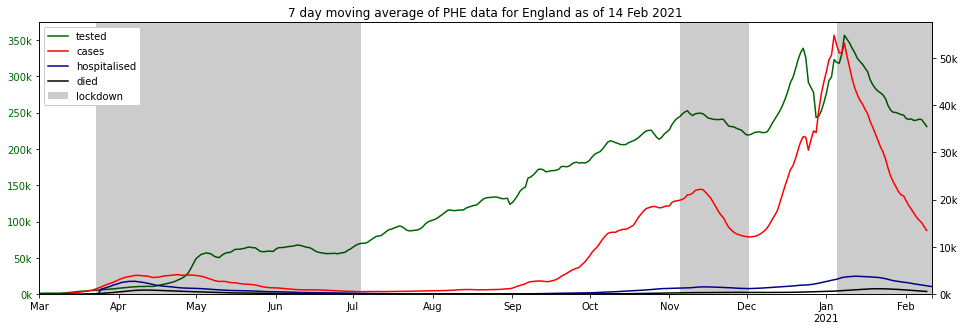

In [2]:
plot_summary(earliest_date='2020-03-01')

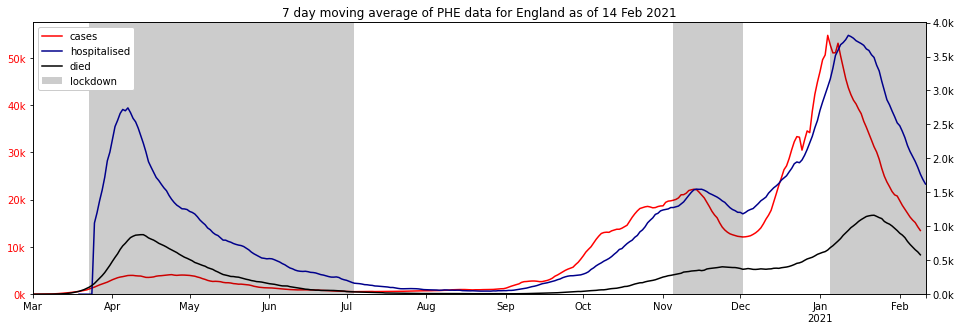

In [3]:
plot_summary(earliest_date='2020-03-01', left_series=(s.new_cases_sum,), 
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,489885.0,12675663.0,12185778.0,56286961,0.870335,21.649380,77.480285
1,Northern Ireland,N92000002,28976.0,391101.0,362125.0,1893667,1.530153,19.122950,79.346897
2,Scotland,S92000003,14281.0,1223774.0,1209493.0,5463300,0.261399,22.138506,77.600095
3,Wales,W92000004,4573.0,771651.0,767078.0,3152879,0.145042,24.329446,75.525512


'partial: 15,062,189'

'full: 537,715'

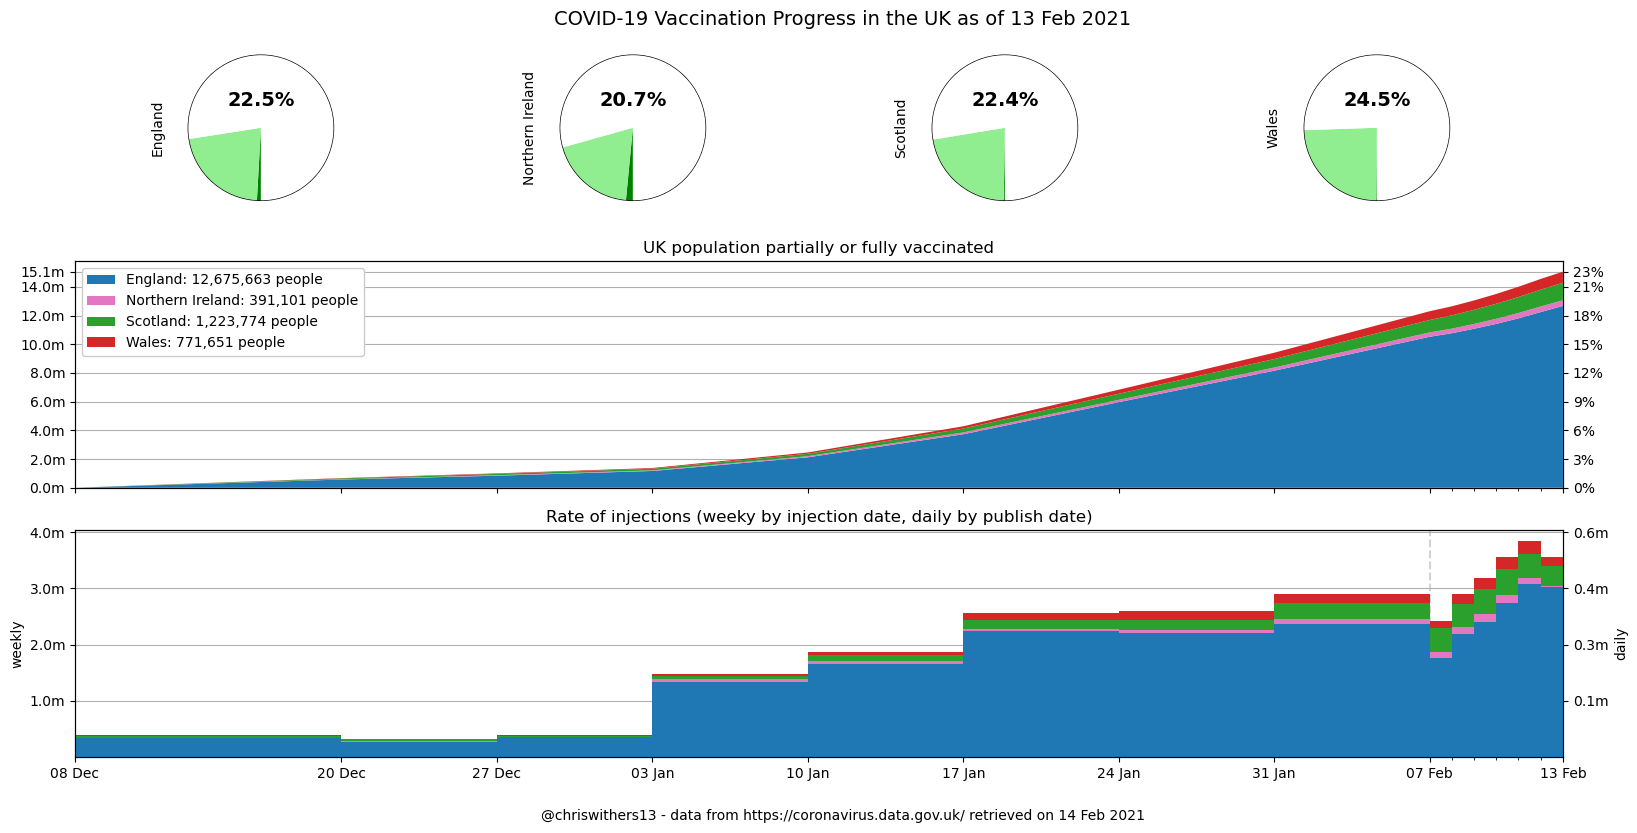

In [4]:
results = vaccination_dashboard()
display(results, f"partial: {results['any'].sum():,.0f}", f"full: {results['full'].sum():,.0f}")

In [5]:
vaccination_changes()

,,First Dose (New),Second Dose (Total),Complete (New),First Dose (Total),cumPeopleVaccinatedSecondDoseByPublishDate,Complete (Total)
,,,,,,,
England,13 Feb 21,"+429,497","+2,186","+2,186","+12,675,663","+489,885","+489,885"
Northern Ireland,13 Feb 21,"+3,330",+39,+39,"+391,101","+28,976","+28,976"
Scotland,13 Feb 21,"+50,329",+272,+272,"+1,223,774","+14,281","+14,281"
Wales,13 Feb 21,"+22,206",+349,+349,"+771,651","+4,573","+4,573"


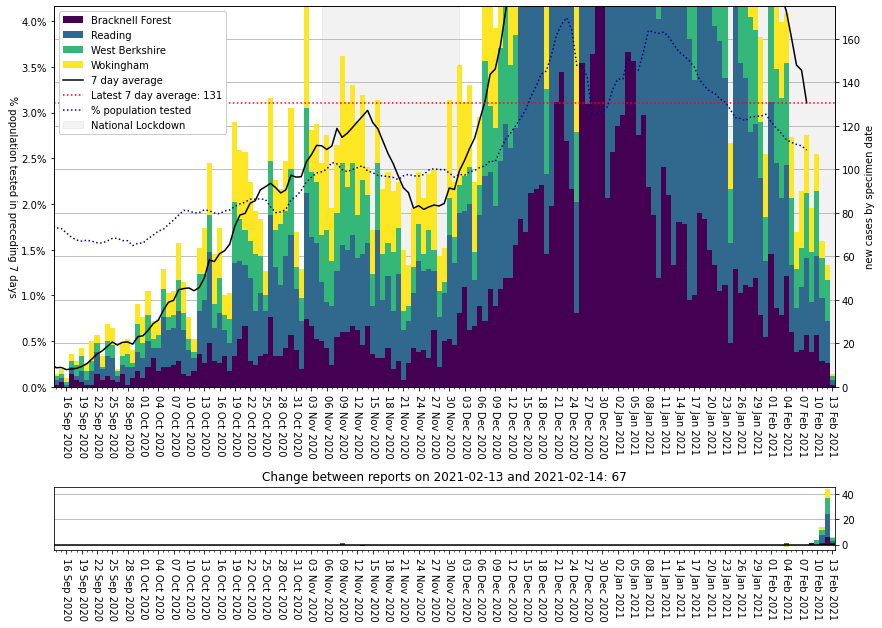

In [22]:
plot_areas(for_date, areas=my_areas, earliest='2020-09-14', ylim=175)

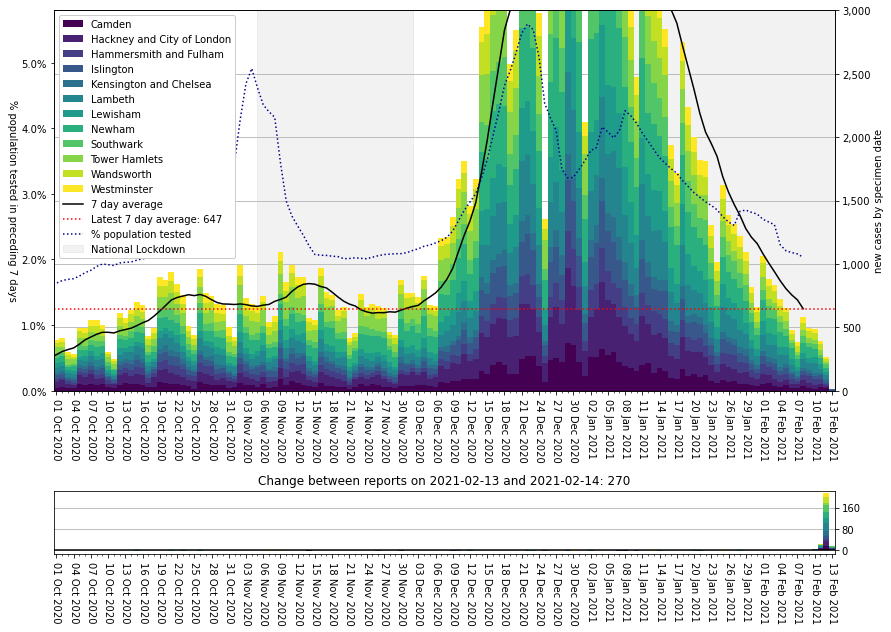

In [7]:
plot_areas(for_date, areas=london_areas, ylim=3_000)

In [8]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [9]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
S12000008,East Ayrshire,294.238177,359.0,2021-02-13
E07000150,Corby,274.169875,198.0,2021-02-13
E06000002,Middlesbrough,272.379061,384.0,2021-02-13
E07000170,Ashfield,253.287262,324.0,2021-02-13
E08000013,St. Helens,252.512667,456.0,2021-02-13
E08000028,Sandwell,249.048561,818.0,2021-02-13
E08000011,Knowsley,245.920112,371.0,2021-02-13
E07000193,East Staffordshire,232.977604,279.0,2021-02-13
E06000016,Leicester,227.539636,806.0,2021-02-13


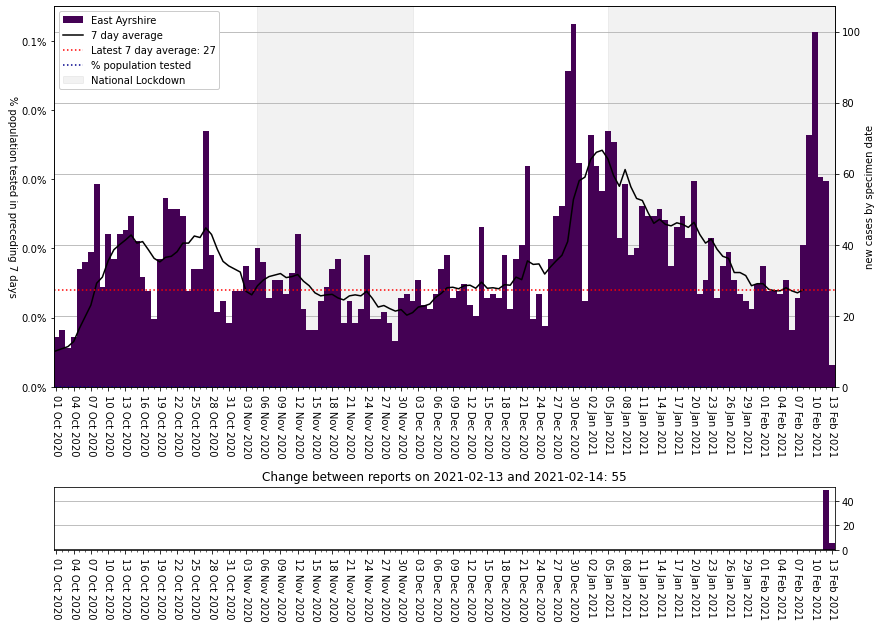

In [10]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [11]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000025,Birmingham,184.443028,2106.0,2021-02-13
E08000035,Leeds,140.706736,1116.0,2021-02-13
E08000032,Bradford,181.742056,981.0,2021-02-13
E08000003,Manchester,162.247810,897.0,2021-02-13
E08000012,Liverpool,173.077773,862.0,2021-02-13
E08000028,Sandwell,249.048561,818.0,2021-02-13
E06000016,Leicester,227.539636,806.0,2021-02-13
S12000049,Glasgow City,126.990144,804.0,2021-02-13
E06000047,County Durham,146.200485,775.0,2021-02-13


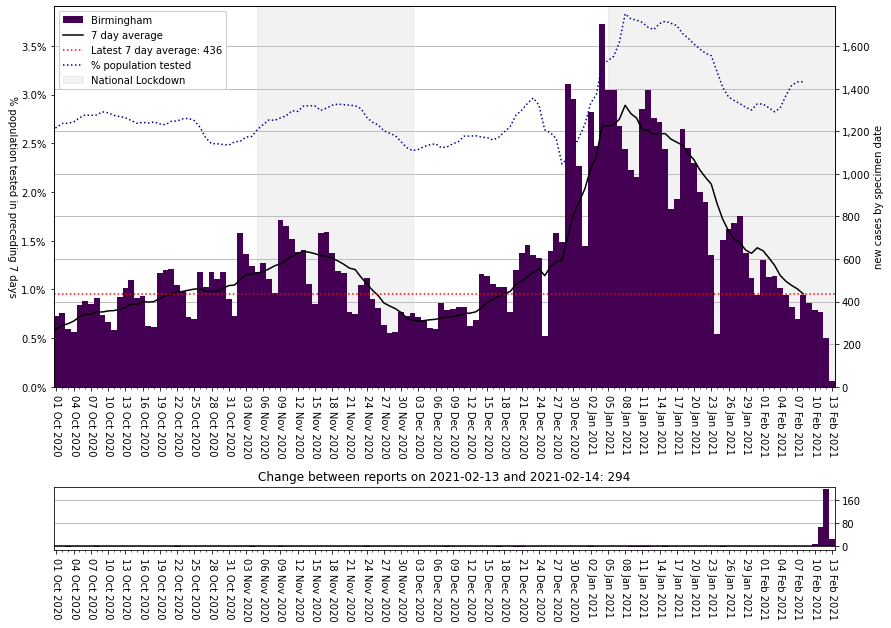

In [12]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [18]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)

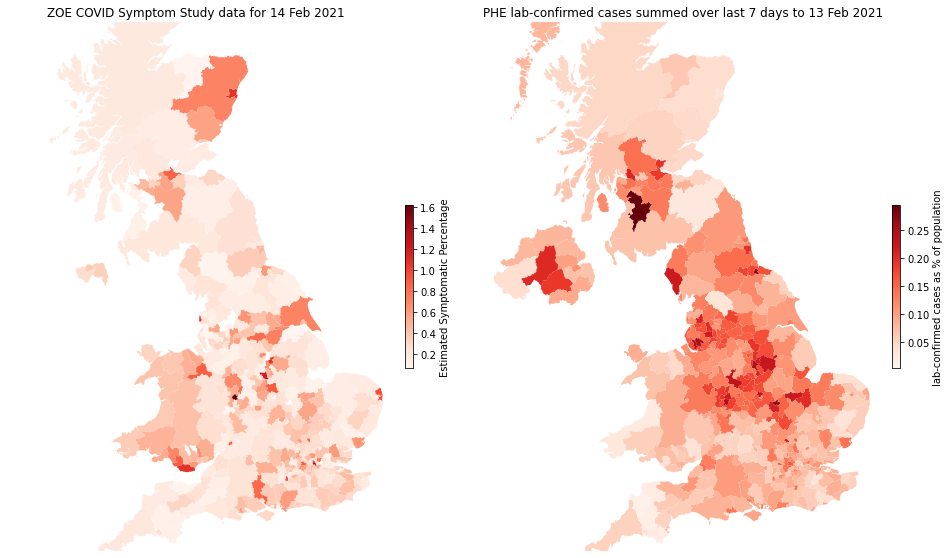

In [19]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, phe_recent_geo, phe_recent_title)   

In [15]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, phe_recent_geo, phe_recent_title)

Loading BokehJS ...

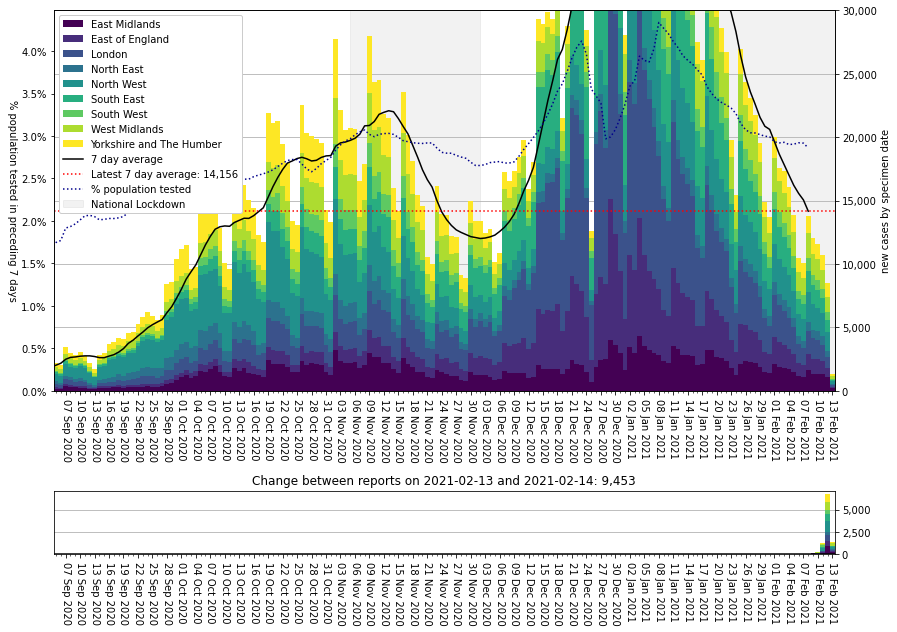

In [21]:
plot_areas(for_date, area_type=region, ylim=30_000, earliest='2020-09-05')

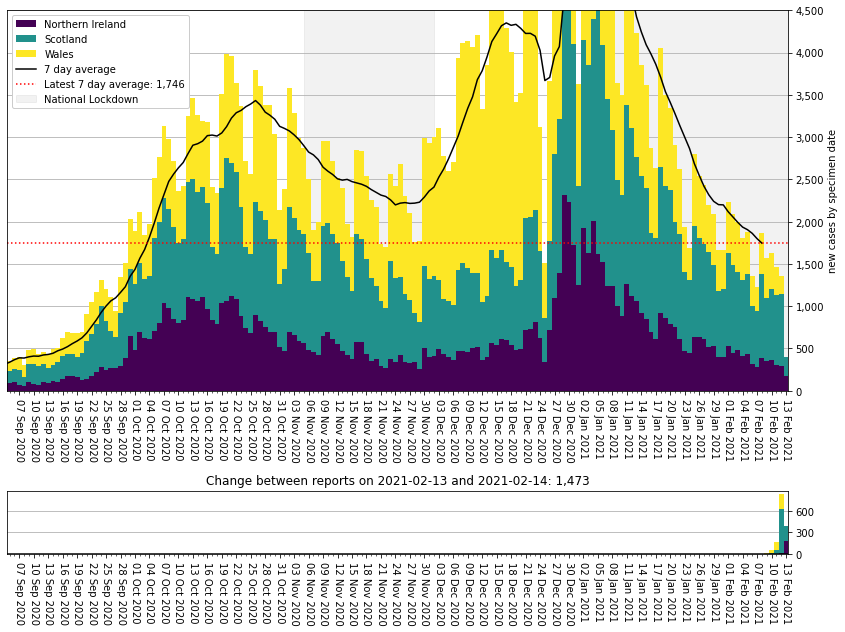

In [17]:
plot_areas(for_date, 'cases_devolved', ylim=4_500, diff_ylims=None, earliest='2020-09-05')